# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=hobart
Processing Record 2 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=lavrentiya
Processing Record 3 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=georgetown
Processing Record 4 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=haines%20junction
Processing Record 5 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=vardo
Processing Record 6 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=nikolskoye
Processing Record 7 | Atuona
http://api.openweathermap.org/data/2.5

Processing Record 56 | Prince Albert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=prince%20albert
City not found. Skipping...
Processing Record 57 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=tiksi
Processing Record 58 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=mahebourg
Processing Record 59 | Agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=agadir
Processing Record 60 | Basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=basco
City not found. Skipping...
Processing Record 61 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=yellowknife
Processing Record 62 | Vostok
http://api.openweathermap.org/data/2.5/weather

Processing Record 110 | Basoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=basoko
Processing Record 111 | Guarapari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=guarapari
Processing Record 112 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=havre-saint-pierre
Processing Record 113 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=airai
Processing Record 114 | Varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=varhaug
Processing Record 115 | Whitehaven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=whitehaven
Processing Record 116 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620

Processing Record 165 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=lagoa
Processing Record 166 | Montepulciano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=montepulciano
Processing Record 167 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=grindavik
Processing Record 168 | Hjelset
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=hjelset
Processing Record 169 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=palmer
Processing Record 170 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=prince%20rupert
Processing Record 171 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a

Processing Record 221 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=imbituba
Processing Record 222 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=beringovskiy
Processing Record 223 | Severobaykalsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=severobaykalsk
Processing Record 224 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=hasaki
Processing Record 225 | Mpulungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=mpulungu
Processing Record 226 | Sarangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=sarangani
Processing Record 227 | Araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620

Processing Record 277 | Samaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=samaro
Processing Record 278 | Maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=maningrida
Processing Record 279 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=cabedelo
Processing Record 280 | Kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=kropotkin
Processing Record 281 | Semibratovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=semibratovo
Processing Record 282 | Teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=teguldet
Processing Record 283 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20e

Processing Record 332 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=rawson
Processing Record 333 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=brae
Processing Record 334 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=alyangula
Processing Record 335 | Fochville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=fochville
Processing Record 336 | Lop Buri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=lop%20buri
Processing Record 337 | Iguape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=iguape
Processing Record 338 | Bagotville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=ba

Processing Record 388 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=leningradskiy
Processing Record 389 | Sao Gabriel da Cachoeira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=sao%20gabriel%20da%20cachoeira
Processing Record 390 | Mangrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=mangrol
Processing Record 391 | Luz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=luz
Processing Record 392 | Alpinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=alpinopolis
Processing Record 393 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=margate
Processing Record 394 | Suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 444 | Preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=preobrazheniye
City not found. Skipping...
Processing Record 445 | Ushtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=ushtobe
Processing Record 446 | Brufut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=brufut
Processing Record 447 | Hibbing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=hibbing
Processing Record 448 | Samana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=samana
Processing Record 449 | Venice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=venice
Processing Record 450 | Sokolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c0

Processing Record 500 | Porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=porbandar
Processing Record 501 | Bongandanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=bongandanga
City not found. Skipping...
City not found. Skipping...
Processing Record 502 | Maheshwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=maheshwar
Processing Record 503 | Guinguineo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=guinguineo
Processing Record 504 | Petatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=petatlan
Processing Record 505 | Rayevskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2b27c01620c4a483416ddd20ee5c790&q=rayevskaya
City not found. Skipping...
Processing Record 506 | Lata

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

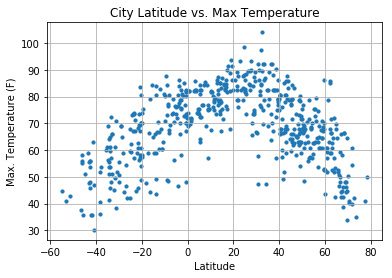

In [10]:

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)



plt.show()

#### Latitude vs. Humidity Plot

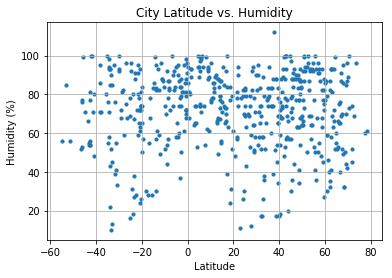

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()



#### Latitude vs. Cloudiness Plot

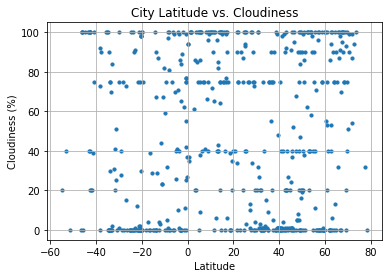

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

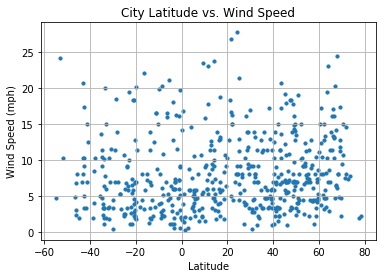

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()